### This notebook is visualise and test our dataset and dataloader

Imports

In [1]:
import torch 
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os
os.chdir("../models")
from common_utils import CustomTransform, get_mean_rgb

Initialise dataset

In [2]:
mean_rgb = get_mean_rgb(datasets.Flowers102(root='../data', split='test', download=True, transform=transforms.ToTensor())) # get mean rgb of training set
transform = CustomTransform(mean_rgb)

train_dataset = datasets.Flowers102(root='../data', split='test', download=True, transform=transform) 
val_dataset = datasets.Flowers102(root='../data', split='val', download=True, transform=transform) 
test_dataset = datasets.Flowers102(root='../data', split='train', download=True, transform=transform) 
# NOTE: Due to a bug with the Flowers102 dataset, the train and test splits are swapped

Check length of datasets

In [3]:
len(train_dataset), len(val_dataset), len(test_dataset)

(6149, 1020, 1020)

Initiliase dataloaders

In [4]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Check labels

In [5]:
# labels are already loaded inside the dataset
for i, (inputs, labels) in enumerate(train_dataloader):
    print("Batch", i)
    print("Labels:", labels)
    break

Batch 0
Labels: tensor([73, 27, 33, 75, 76, 66, 33, 72,  1, 84, 93, 16, 73, 80, 93, 87, 46, 57,
        13, 29, 80, 82, 77, 72, 41, 64, 76, 82, 85, 55, 93, 42])


---
Let's visualise the dataset after transformation

torch.Size([32, 3, 100, 100])


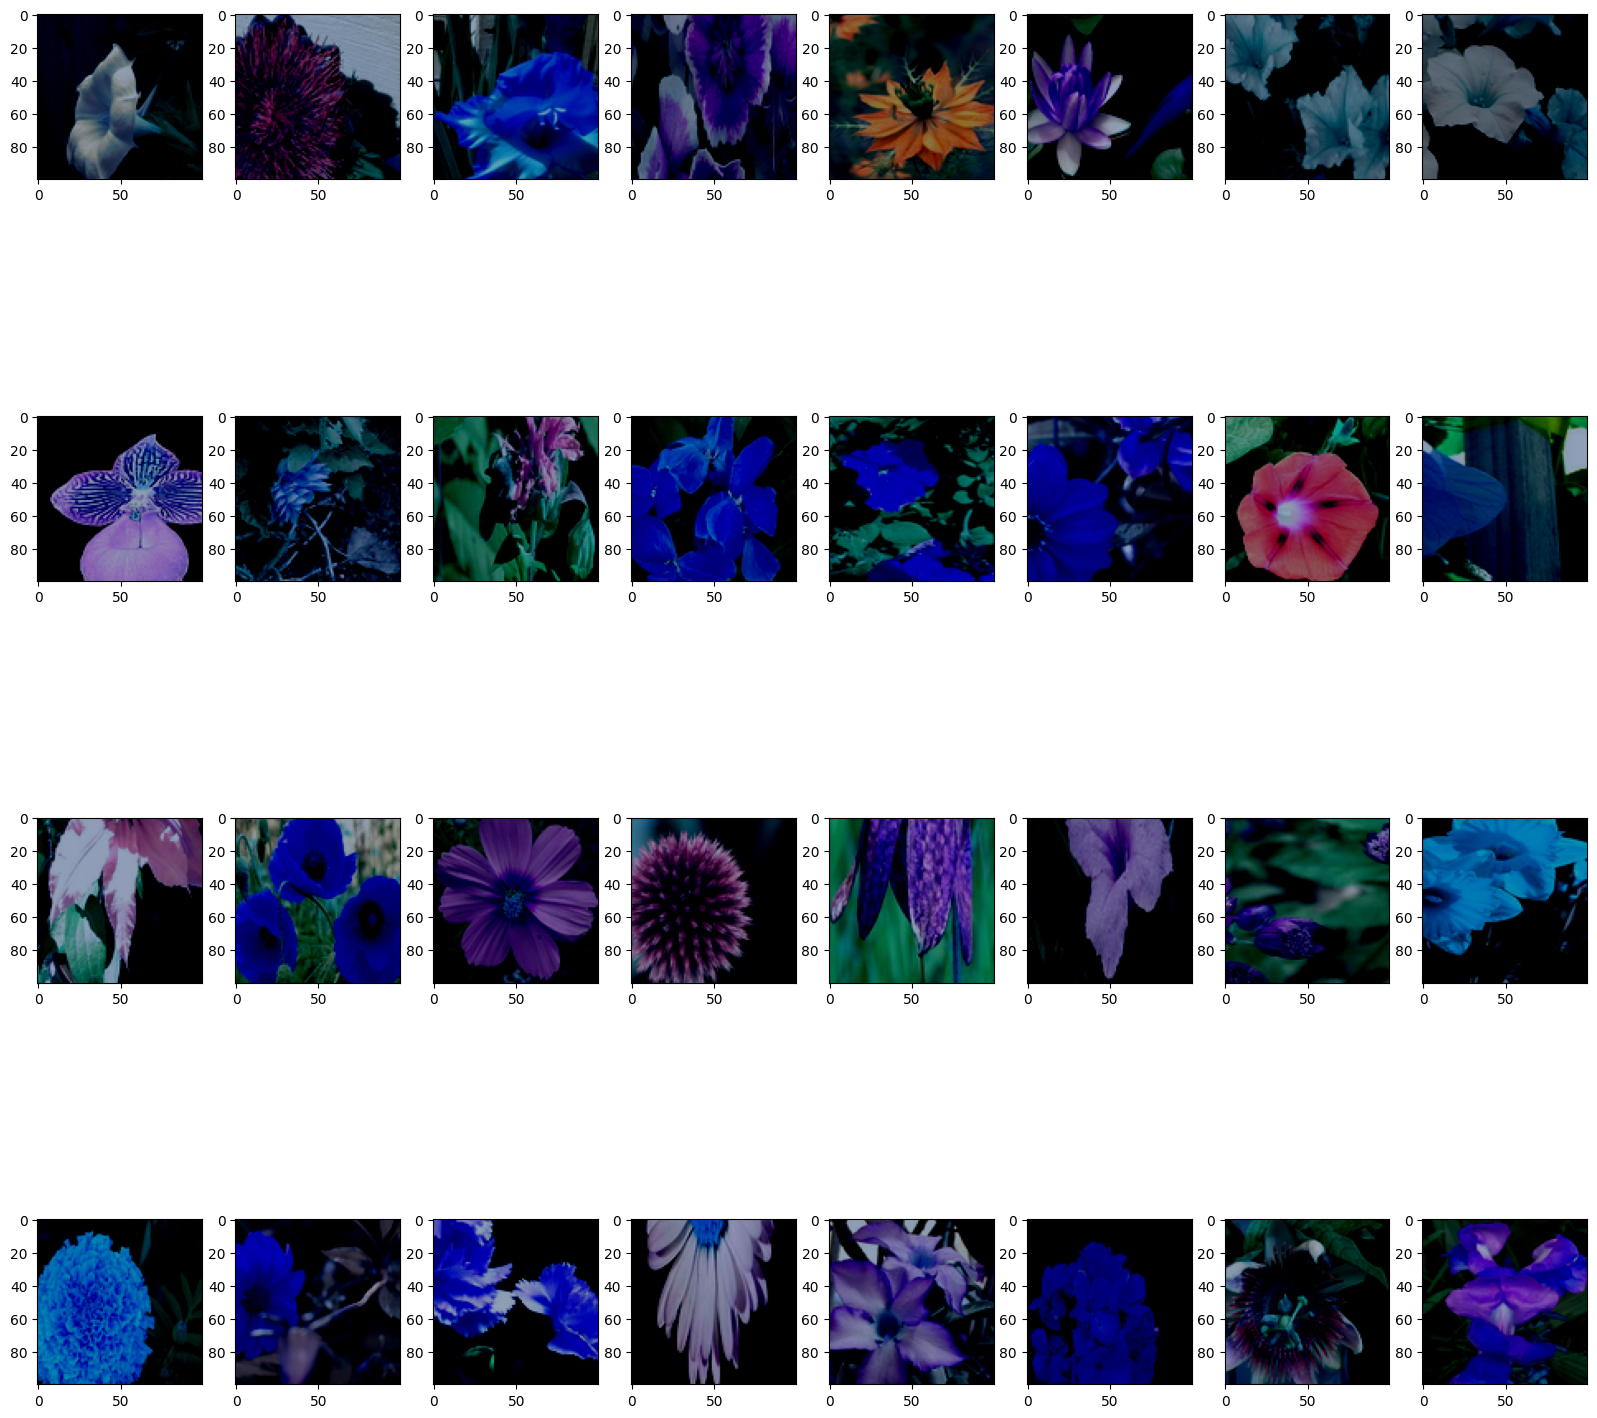

In [6]:
import os
os.chdir("../models")
from model import CustomCNN
import matplotlib.pyplot as plt

# Select random sample
seed = 1
torch.manual_seed(seed)
images, labels = next(iter(train_dataloader))
print(images.shape)

fig = plt.figure(figsize=(20, 20))

# plot all 32 images in the batch
for i in range(32):
    # Transpose the tensor dimensions to (height, width, channels)
    img = images[i].permute(1, 2, 0).numpy()

    ax = fig.add_subplot(4, 8, i+1)
    ax.imshow(img)

plt.show()

Next, let's visualise the convolutional layers and pooling layers output

In [7]:
model = CustomCNN()
conv1, p1, conv2, p2, conv3, p3, conv4, conv5, p5, _ = model(images)
print(conv1.shape, p1.shape, conv2.shape, p2.shape, conv3.shape, p3.shape, conv4.shape, conv5.shape, p5.shape)

torch.Size([32, 64, 100, 100]) torch.Size([32, 64, 49, 49]) torch.Size([32, 128, 49, 49]) torch.Size([32, 128, 24, 24]) torch.Size([32, 256, 24, 24]) torch.Size([32, 256, 11, 11]) torch.Size([32, 512, 11, 11]) torch.Size([32, 512, 11, 11]) torch.Size([32, 512, 5, 5])


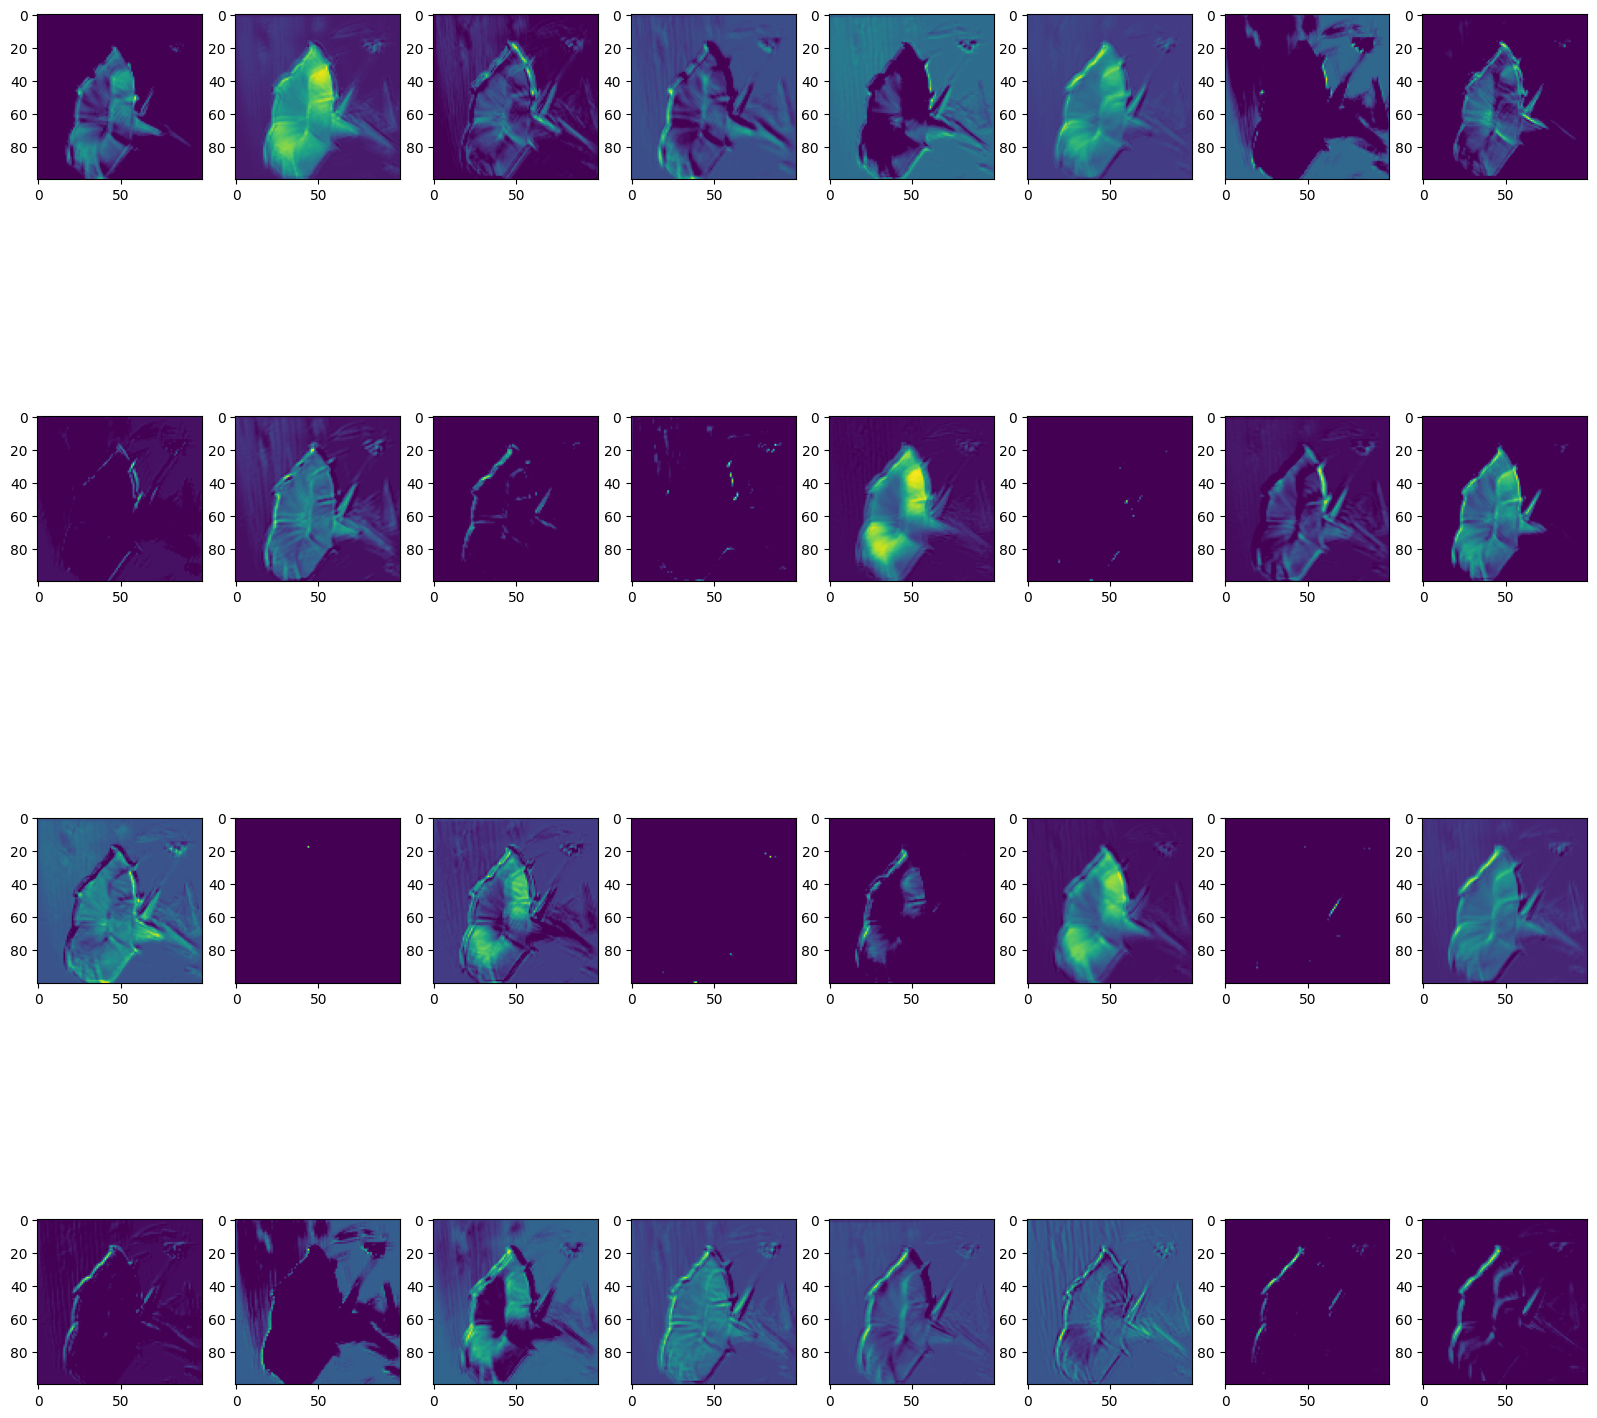

In [8]:
# plot all 32 feature maps for the first convolutional layer
fig = plt.figure(figsize=(20, 20))
for i in range(32):
    ax = fig.add_subplot(4, 8, i+1)
    ax.imshow(conv1[0, i].detach().numpy())
plt.show()

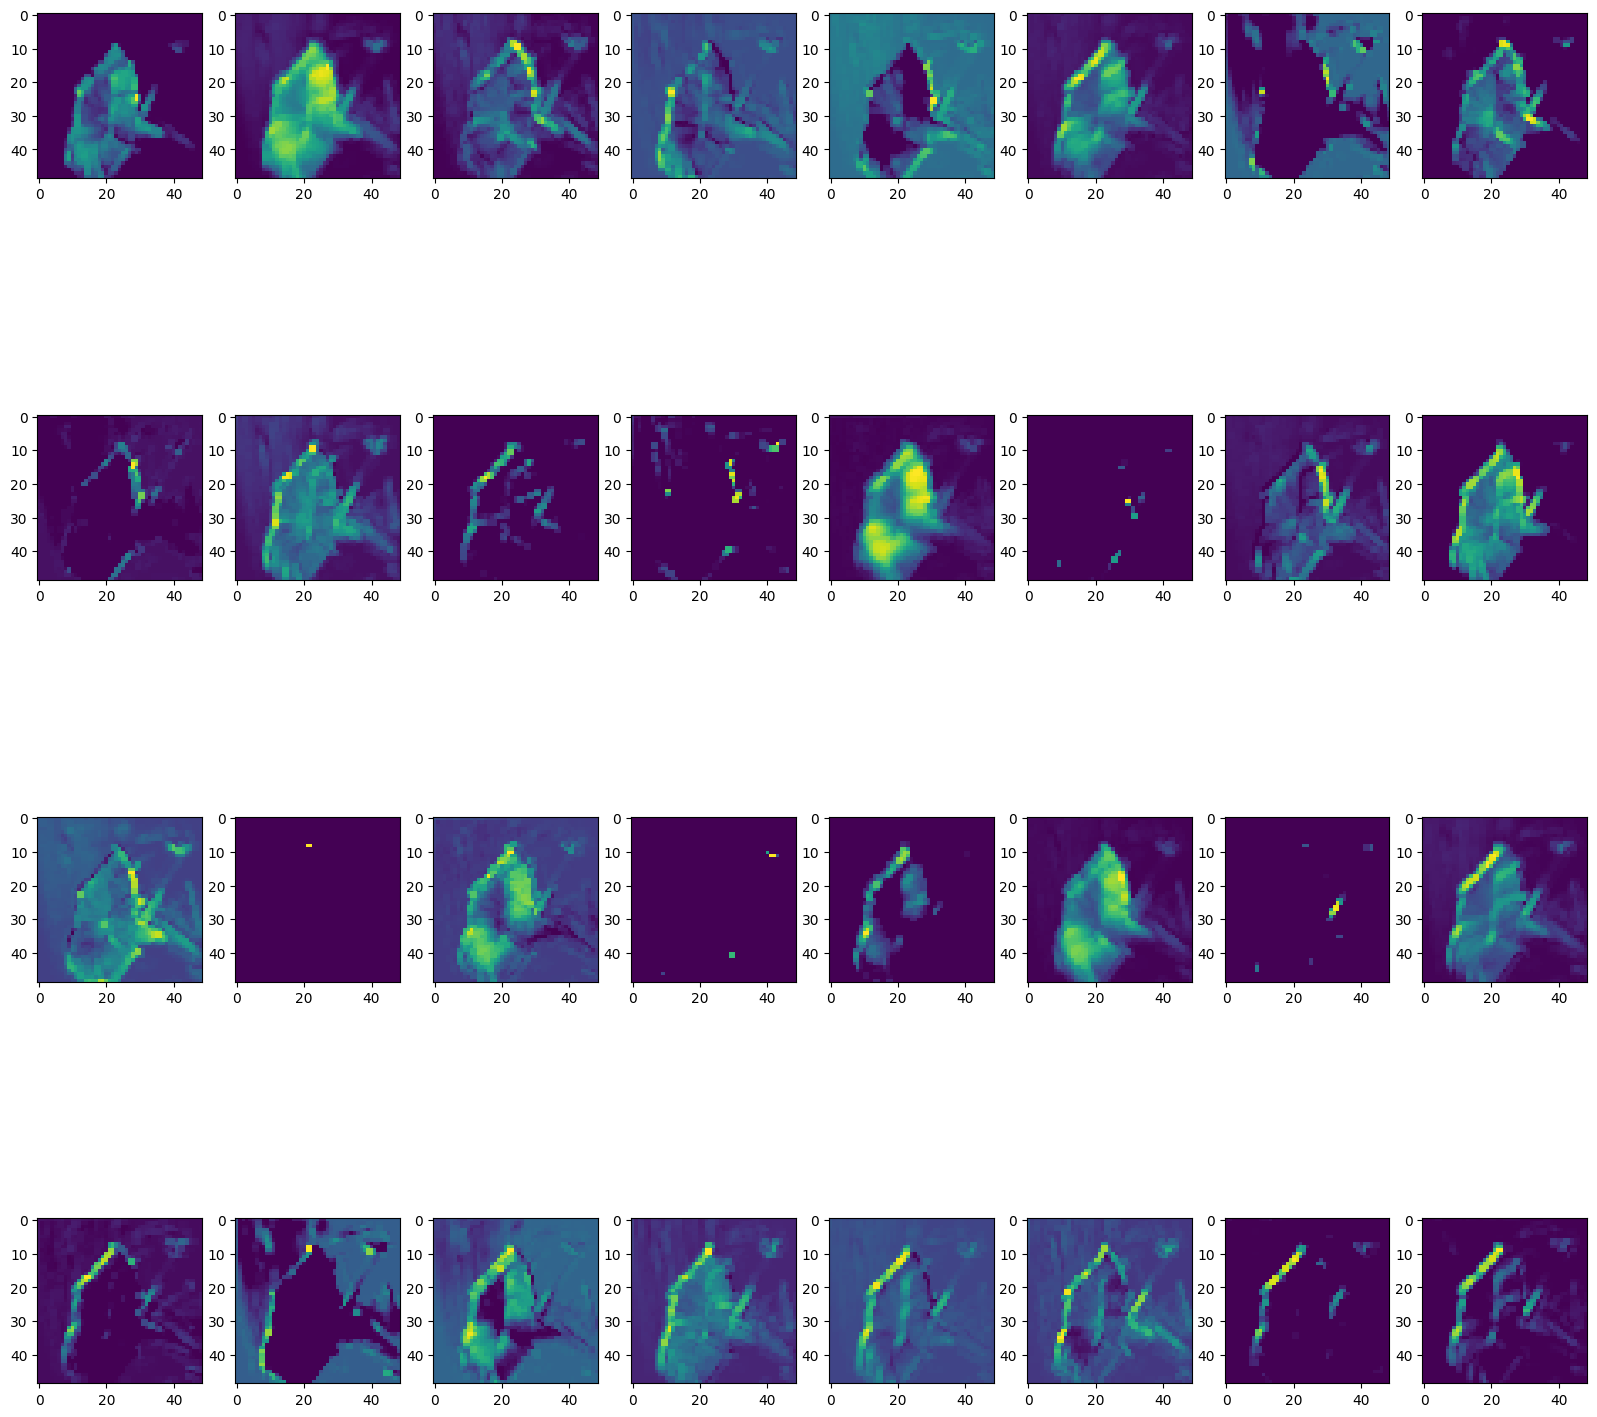

In [9]:
# plot all 32 pooled feature maps for the first convolutional layer
fig = plt.figure(figsize=(20, 20))
for i in range(32):
    ax = fig.add_subplot(4, 8, i+1)
    ax.imshow(p1[0, i].detach().numpy())
plt.show()